<a href="https://colab.research.google.com/github/hopeyen/15-388/blob/main/tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Neural Networks with TensorFlow - Introduction 

This tutorial will take you step-by-step to building deep learning models using the Keras API built into Tensor Flow. The two major models we will be building are sequential models with Convolutional Neural network and functional models with self-defined parameters. 

Deep learning is one of many machine learning methods used on artificial neural networks with large amounts of data.  It can be applied to many real world situations, such as self driving cars, facial recognition, colorizing old pictures, natural language processing, and even medical scanning. Deep learning models find the best representation of a real life problem and learn to solve them. 

TensorFlow, in particular, is a  an end-to-end open source platform. It provides a framework for building, training, and deploying ML models. Keras API is a clean and simple neural network library, which makes TensorFlow easier to use from defining, fitting, and evaluating deep learning models, to predicting on test data. 

## Tutorial Content

In this tutorial, we will go over some basic definitions that are used in deep learning, the general life cycle of a deep learning model, and go over the detail of building sequential and functional models. We end the tutorial by looking at some advanced features to avoid overfitting and accelerate training of the model. 

There will be eight major sections in this tutorial. 

1) [Installing TensorFlow](https://colab.research.google.com/drive/1sqGha4QjekrLg4YlWSfhFxs2ahf_bX7z?authuser=1#scrollTo=m-otxYCRbqcz)

2) [Important Terminology](https://colab.research.google.com/drive/1sqGha4QjekrLg4YlWSfhFxs2ahf_bX7z#scrollTo=2buXAxEmP5Yr)

3) [The Typical Life Cycle of a Model](https://colab.research.google.com/drive/1sqGha4QjekrLg4YlWSfhFxs2ahf_bX7z#scrollTo=pwb5urJlfzkV)

4) [Sequential Model](https://colab.research.google.com/drive/1sqGha4QjekrLg4YlWSfhFxs2ahf_bX7z#scrollTo=Kad7y04a4GuN&line=1&uniqifier=1) (with Convolutional Neural Network)

5) [Functional Model](https://colab.research.google.com/drive/1sqGha4QjekrLg4YlWSfhFxs2ahf_bX7z#scrollTo=gXSRAZBjAoeU&line=1&uniqifier=1) (with self-defined layers)

6) [Advanced Features](https://colab.research.google.com/drive/1sqGha4QjekrLg4YlWSfhFxs2ahf_bX7z#scrollTo=_gLOHqUS3Ryv&line=1&uniqifier=1)

[References](https://colab.research.google.com/drive/1sqGha4QjekrLg4YlWSfhFxs2ahf_bX7z#scrollTo=nrt8TcSiOFjl&line=19&uniqifier=1)

# Installing Tensorflow

Before we start developing models, we need to install the necessary libraries. You can install Tensorflow and other libraries using 

```!pip install```.

The output could look something like the follow if you already have everything installed.


In [ ]:
!pip install tensorflow

After installation, you can import the module, and also check the version of tensorflow.

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.4.1


Note that the Keras API comes with Tensorflow so we do not have to install it separately.

In this section we will also import some modules that will be of use for later. Make sure the following commands work for you, and use ```!pip install``` if any of the modules needs installing. 

In [ ]:
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras import Sequential

from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_auc_score, accuracy_score
import numpy as np
import matplotlib.pyplot as plt


# Some Definitions

We will not go over definitions such as the batch size, activation function, and loss function, but if you are interested in learning more of these definitions, check the lectures on Machine Learning. 

###Some activation functions we will use:

**Rectified Linear Unit (ReLU)** - a  specific and popular activation function that we will be using a lot. return 0 if x<=0, else x. It is continuous but not differentiable. It is fast to compute, but it suffers from this problem called dying ReLU, where some neurons dies and cannot be affected by gradient descent. 

**Sigmoid (Logistic)** - a specific and popular activation function: sigma(x)=1/(1+e^{-x}). Has nonzero derivative everywhere, such that gradient descent can always make progress. Although it is averages at 0.5 instead of 0, and has vanishing gradient and exponential operations.

**Hyperbolic Tangent (Tanh)** - a popular activation function: tanh(x)=(e^x-e^{-x})/(e^x+e^{-x}). Centered at 0 as well as differentiable. However, it also has vanishing gradient and exponential operations.

###The layers we will use:

**Layer** - the highest-level building block in deep learning. It is a container that transform the input using a set of activation functions and pass the output to the next layer. The first layer is the input layer, the last layer is the output layer, and the layers in the middle are hidden layers.

**Dense (or fully connected) layers** - All the nodes are connected to all nodes in the subsequent layer. Example: ```Dense``` creates a dense layer of N-D as specified. 

**Convolutional layers** - a convolutional filter passes along an input matrix. An intuitive way of thinking about this layer is a filter, in which the the kernel filters the features for information they care about. Example: ```Conv2D``` creates a 2D convolutional layer. 

**Pooling layers** - reducing a matrix created by convolutional layer to a smaller matrix. Usually by taking the maximum or average value across the pooled area. Example: ```maxPooling2D``` creates a pooling layer that takes the maximum. 

###Other things related:

**Tensor** - generalization of vectors and matrices, can be scalar, vector, matrix, and multidimensional tensor. 

**Receptive field** - In a convolutional layer, the restricted area of the previous layer that are received by the neuron in the current layer. 

**Weights** - Neuron computs an output value by applying a function to the input values. The function is determined by a vector of weights and bias (filters).

**Backpropagation** - Basically gradient descent on individual errors. Compares the prediction with target output to find the gradient of the errors with respect to weights such that the model knows which direction will give smaller errors.

# Model Life Cycle

In general, a model experiences a life cycle such as the following: define, compile, fit, evaluate, use to make prediction. 

**Defining the model** involves choosing the type of the model, the network topology (input and output sizes), the number and types of layers, number of neurons in each layer, activation function, connections, etc. 

**Compiling the model** involves choosing the loss function and the algorithm that aim to minimize the loss. tf.keras has a specific module  ```tf.keras.optimizers ``` that provides different optimizers which uses a varity of algorithms, such as the Gradient descent (with momentum) optimizer. The module ```tf.keras.losses``` provides different loss functions, such as binary crossentropy, cosine similarity, mean squared error, and poisson. You can also include a metrics parameter, with ```tf.keras.metrics```, that has metrics such as accuracy, precision, recall, true positives, and true negatives. 

**Fitting the model** involves choosing training configurations such as the epoch and batch size. This is when the optimizer is used to minimize the loss. The simple example is calling ```.fit()``` on the model.

**Evaluating the model** involves chossing techniques such as the k-fold cross validation to split the data for fit and evaluation. We should not evaluate the model on test data because deep learning models are stochastic. We can control model stability by setting a random seed or repeat the evaluation process on a non-stochastic model. The actual evaluation process invovles creating statistics such as mean, standard deviation, and confidence interval. 

**Making a prediction** is the goal of deep learning models. We can simply call ```.predict(testset)``` on the model to make the prediction on the test set. 


# Sequential Model APIs

Sequential models are used when we have sequences of data, such as acoustic input for speech recognition, video for activity recognition, words for rating prediction, etc. 

To make a sequential model, we need to define a Sequential class and add layers one by one, from the input to the output. Note that sequential APIs are not appropriate when you have a nonlinear topology, or need layer sharing. 

Say that we have a model that gets 8 inputs, produce 2 outputs, with a hidden layer of 10 nodes, and then a hidden layer of 5 nodes, both hidden layer uses the rectified linear activation function. The ```activation``` and ```name``` parameters are both optional, but the parameter ```name``` is particularly useful for when we want to generate TensorBoard graphs, as it annotate the nodes. Then we can write code such as the following to define the model:


In [ ]:
model = keras.Sequential(name="sequential_api_1")

# the below two lines can be combined into 
# model.add(layers.Dense(10, activation="sigmoid", input_shape=(8,)))
model.add(keras.Input(shape=(8,)))
model.add(layers.Dense(10, activation="sigmoid", name="layer_1"))

model.add(layers.Dense(5, activation="relu", name="layer_2"))
model.add(layers.Dense(2, activation='tanh', name="layer_3"))

You can review the content of the model

In [ ]:
model.summary()

Model: "sequential_api_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_1 (Dense)              (None, 10)                90        
_________________________________________________________________
layer_2 (Dense)              (None, 5)                 55        
_________________________________________________________________
layer_3 (Dense)              (None, 2)                 12        
Total params: 157
Trainable params: 157
Non-trainable params: 0
_________________________________________________________________


Note that the input layer is visible, so we do not need to add it separately. If you want to remove a layer, you can call ```.pop()``` on the model. 

After defining the model, you can use ```.compile()```, ```.fit()```, ```.save()``` and other operations. We will go over these methods later but even different models will behave the same in these steps, including functional APIs. 

One thing to note is that we can extract the outputs of all the intermediate layers. Feature extraction is useful when we need to reduce redundant data without losing important information. This allows the model to learn with less effort and higher speed. 

Below we build a sequential model with 2D convolution layers and extract the intermediate layers:

In [ ]:
## A different way to defining the model
seq_model_2 = keras.Sequential(
    [
        keras.Input(shape=(50, 50, 3)),
        layers.Conv2D(32, 4, strides=2, activation="relu"),
        layers.Conv2D(16, 3, activation="sigmoid", name ="layer_2"),
        layers.Conv2D(15, 2, activation="softmax"),
    ], name="sequential_api_2"
)

## make the feature extractor
feature_extractor = keras.Model(
    inputs=seq_model_2.inputs,
    outputs=[layer.output for layer in seq_model_2.layers],
)
## if you just want one specific layer, replace the above line with
#     outputs=seq_model_2.get_layer(name="layer_2").output,

## Then, you can just call feature extractor on the test set, for example:
x = tf.ones((1, 50, 50, 3))
features = feature_extractor(x)

Some popular sequential models include:


**Multiplayer perceptron (MLP)** a supervised learning algorithm that learns a function ```f(·): R^m -> R^o``` where m is the number of dimensions for input and o is the number of dimensions for output. It will use a set of features and a target to create one or more non-linear layers (hidden layers) using a non-linear function approximator. It can also learn models in real-time. However, MLP with hidden layers uses non-convex loss function so there might exist multiple local minimum that lead to different validation accuracy if start point varies. MLP is appropriate to use especially when you have tabular data, and it is usually useful for simple regression problems. It can also solve binary and multiclass classification problems. 

**Convolution neural network (CNN)** a variation of MLP. It can contain more than 1 convolution layer, and is useful for image recognition. We will go into detail in the next subsection. 

**Recurrent Neural Network (RNN)** the output of a neuron is fed back as an input to the same neuron. This allows weights to be shared and for the model to remember the previous inputs. Patterns allow the network to discover dependence on the historical data, useful for prediction in natural language processing and creating chatbots.  



## Convolutional Neural Network (CNN)

**Convolutional neural networks** (also known as CNN, ConvNet, Space Invariant Artificial Neural Networks) are usually used to analyze visual images. Some might consider CNN as the regularized versions of MLP, prevents overfitting by assembling patterns of increasing complexity using smaller and simpler patterns embossed in the filters.

For this section's example, we use the CIFAR-10 dataset (Canadian Institute For Advanced Research). It contains 60,000 32x32 pixel color images in 10 different classes that are items for animals. The dataset provides a mean for computer to recognize objects. The labels are as follows: 0: airplane; 1: automobile; 2: bird; 3: cat; 4: deer; 5: dog; 6: frog; 7: horse; 8: ship; 9: truck.

First, load and normalize the data.


In [ ]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

# normalize the input values to be in [0,1]
X_train, X_test = X_train / 255.0, X_test / 255.0

170500096/170498071 [==============================] - 2s 0us/step


Let's define the model. First create the convolutional base of shape (4,4,64), and then add dense layers on top. You can add multiple dense layers, who needs flattened inputs.

In [ ]:
model = models.Sequential(name="CIFAR-10-CNN-1")

# Configure the convolutional base, using ReLU
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))

# Flatten the tensors and add a new dense layer, with sigmoid
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='sigmoid'))

# Final output layer
model.add(layers.Dense(10))

Let's look at both the summary and the plot of our model to make sure we have built what we wanted.

Model: "CIFAR-10-CNN-1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 256)         295168    
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dense (Dense)                (None, 64)             

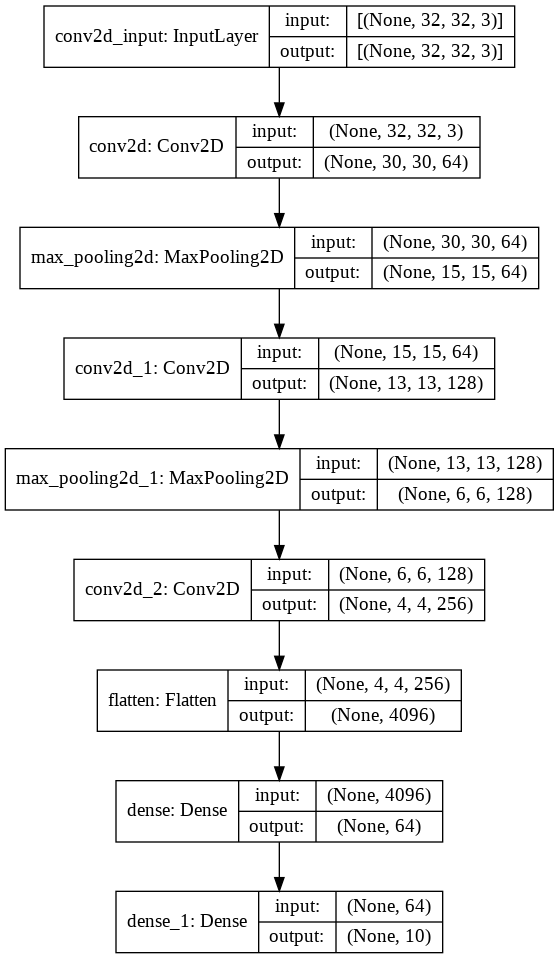

In [ ]:
model.summary()
tf.keras.utils.plot_model(model, 'CIFAR-10-CNN-model-1.png', show_shapes=True)

Now that we finished building the model, we can compile and train it. We are going to use Adam optimization (replacement optimization algorithm for stochastic gradient descent), Sparse categorical crossentropy loss function (since there are multiple classes and y_pred is expected to be a logits tensor), and let metrics be accuracy instead of Poisson, precision, or something else. 

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 222s 141ms/step - loss: 1.7377 - accuracy: 0.3572 - val_loss: 1.1901 - val_accuracy: 0.5792
Epoch 2/10
1563/1563 [==============================] - 217s 139ms/step - loss: 1.1259 - accuracy: 0.6048 - val_loss: 1.0075 - val_accuracy: 0.6460
Epoch 3/10
1563/1563 [==============================] - 218s 139ms/step - loss: 0.8930 - accuracy: 0.6907 - val_loss: 0.8864 - val_accuracy: 0.6869
Epoch 4/10
1563/1563 [==============================] - 218s 139ms/step - loss: 0.7613 - accuracy: 0.7367 - val_loss: 0.8172 - val_accuracy: 0.7180
Epoch 5/10
1563/1563 [==============================] - 218s 139ms/step - loss: 0.6625 - accuracy: 0.7714 - val_loss: 0.8300 - val_accuracy: 0.7196
Epoch 6/10
1563/1563 [==============================] - 216s 138ms/step - loss: 0.5770 - accuracy: 0.8004 - val_loss: 0.7947 - val_accuracy: 0.7347
Epoch 7/10
1563/1563 [==============================] - 217s 139ms/step - loss: 0.4964 - accuracy: 0.8293 - val_

Now we evaluate and visualize the model 

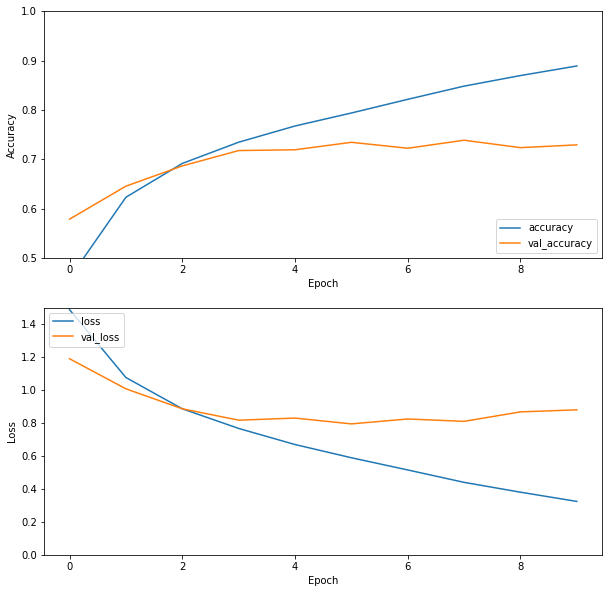

In [ ]:
# define a visualization function for later useage as well
def visualize(history):
  fig, axes = plt.subplots(2,1,figsize=(10,10))

  # Accuracy 
  ax = axes[0]
  ax.plot(history['accuracy'], label='accuracy')
  ax.plot(history['val_accuracy'], label = 'val_accuracy')
  ax.set_xlabel('Epoch')
  ax.set_ylabel('Accuracy')
  ax.set_ylim([0.5, 1])
  ax.legend(loc='lower right')

  # Loss
  ax = axes[1]
  ax.plot(history['loss'], label='loss')
  ax.plot(history['val_loss'], label = 'val_loss')
  ax.set_xlabel('Epoch')
  ax.set_ylabel('Loss')
  ax.set_ylim([0, 1.5])
  ax.legend(loc='upper left')

visualize(history.history)

After visualizing the model, we can evaluate the model by making prediction on the test set. With this, we can see how accurate the model is. 

In [ ]:
print(model.evaluate(X_test,  y_test, verbose=2))

313/313 - 8s - loss: 0.8802 - accuracy: 0.7295
[0.8802181482315063, 0.7294999957084656]


We find that when being tested on the test set, the model only scored a 72.95% accuracy and a high loss value of 0.88, which means that there are a lot of improvements that can be made, such as defining a new topology for the model or changing the fit configurations. 

Let's define a new CNN model. This time, we use he uniform as a kernel initializer, which draws samples from a uniform distribution. (there are a lot of other initializers you can choose from, more in the reference section)


In [ ]:
model = Sequential(name = "CIFAR-10-CNN-2")

# A new convolutional base
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='normal', padding='same', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='normal', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='RandomUniform', padding='same'))
model.add(layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='RandomUniform', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the tensors, add a new dense layer, and the output layer
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu', kernel_initializer='lecun_uniform'))
model.add(layers.Dense(10, activation='softmax'))

## If you want, visualize the model by uncommenting the following line
# tf.keras.utils.plot_model(model, 'CIFAR-10-CNN-model-2.png', show_shapes=True)

Compile, fit, visualize, and evaluate the new model, same to before. For your reference, the model took about one hour to finish the 10 epochs. 

Epoch 1/10
1563/1563 [==============================] - 1189s 760ms/step - loss: 1.7707 - accuracy: 0.3414 - val_loss: 1.1175 - val_accuracy: 0.6067
Epoch 2/10
1563/1563 [==============================] - 1186s 759ms/step - loss: 0.9580 - accuracy: 0.6600 - val_loss: 0.8445 - val_accuracy: 0.7012
Epoch 3/10
1563/1563 [==============================] - 1158s 741ms/step - loss: 0.7050 - accuracy: 0.7532 - val_loss: 0.7263 - val_accuracy: 0.7547
Epoch 4/10
1563/1563 [==============================] - 1147s 734ms/step - loss: 0.5552 - accuracy: 0.8071 - val_loss: 0.7435 - val_accuracy: 0.7525
Epoch 5/10
1563/1563 [==============================] - 1148s 734ms/step - loss: 0.4377 - accuracy: 0.8457 - val_loss: 0.7281 - val_accuracy: 0.7635
Epoch 6/10
1563/1563 [==============================] - 1147s 734ms/step - loss: 0.3472 - accuracy: 0.8778 - val_loss: 0.7546 - val_accuracy: 0.7681
Epoch 7/10
1563/1563 [==============================] - 1150s 736ms/step - loss: 0.2624 - accuracy: 0.9073

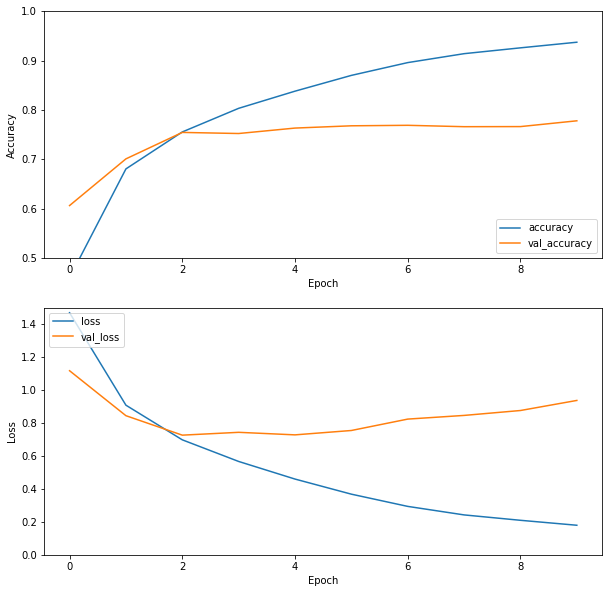

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_test, y_test))

visualize(history.history)
print(model.evaluate(X_test, y_test, verbose=2))

Compared to the previous model, the current CNN model scored loss value of 0.964, and accuracy of 75.83%. While the loss is higher, the accuracy became better. Note that the model took much longer than the previous one, so we need to think about the trade off between efficiency and effectiveness. 

Now, let's move on the functional models. 

# Functional Model APIs

Functional APIs are more complex but also more flexible than sequential APIs. It supports non-linear topology, shared layers, and multiple inputs or outputs. It would be useful to think of constructing a functional model as building a directed acyclic graph, where layers are the nodes, and the connection between the layers are arrows. 

To make a functional API, we start by creating an input node of certain shapes. We call ```layer.add()``` as if we are drawing an arrow from the previous layer/input to the next layer/output. Then, we call ```.Model()``` with inputs and outputs to create the model. Similar to sequential models, we can call ```.summary()``` to make sure the parameters are what we desired. Additionally, we can call ```keras.utils.plot_model()``` to visualize at the graph. 



In [ ]:
# define the input shape and start the base
inputs = keras.Input(shape=(32, 64, 3), name="functional_model_1_img")
x = layers.Conv2D(32, 5, activation="relu")(inputs)
x = layers.Conv2D(64, 5, activation="relu")(x)
block_1 = layers.MaxPooling2D(5)(x)

# add blocks
x = layers.Conv2D(64, 4, activation="relu", padding="same")(block_1)
x = layers.Conv2D(64, 4, activation="relu", padding="same")(x)
block_2 = layers.add([x, block_1])

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3 = layers.add([x, block_2])

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_4 = layers.add([x, block_3])

# output layer
x = layers.Conv2D(64, 2, activation="relu")(block_4)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)

Just for fun, we will also use the dropout feature here. This is a regularization method that helps with reducing overfitting and makes the model more robust. It makes the training process noisy. Below we made the dropout to be 50%. 


Model: "functional_model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
functional_model_1_img (InputLa [(None, 32, 64, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_18 (Conv2D)              (None, 28, 60, 32)   2432        functional_model_1_img[0][0]     
__________________________________________________________________________________________________
conv2d_19 (Conv2D)              (None, 24, 56, 64)   51264       conv2d_18[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_6 (MaxPooling2D)  (None, 4, 11, 64)    0           conv2d_19[0][0]                  
_________________________________________________________________________________

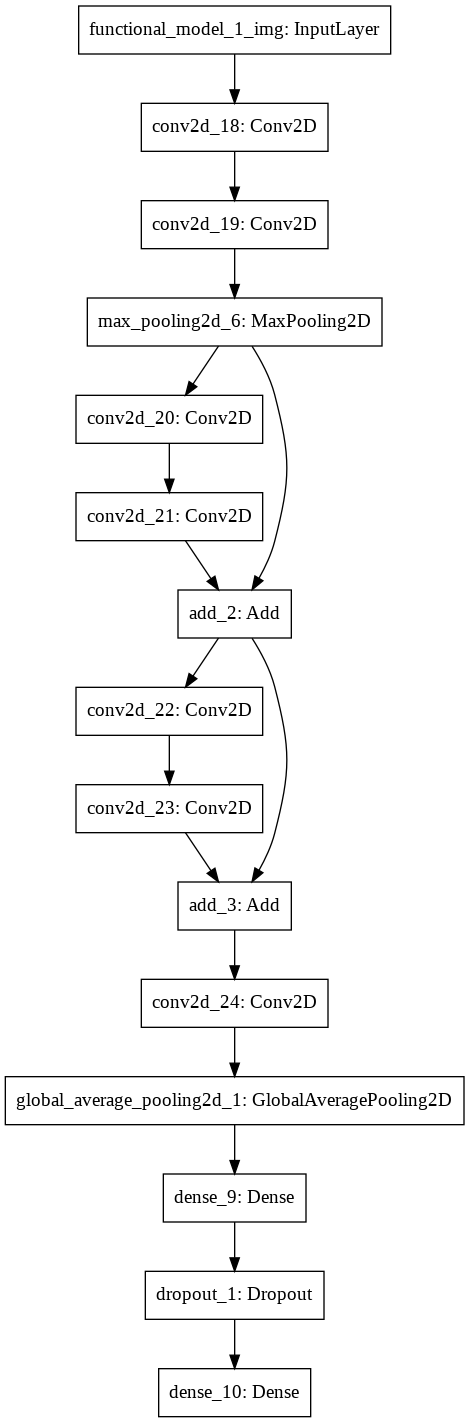

In [ ]:
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10)(x)

model = keras.Model(inputs, outputs, name="functional_model_1")

model.summary()

## add this to the following line if you would like to see the shapes as well
# show_shapes=True
keras.utils.plot_model(model, "functional_model_1.png")

Fitting, evaluating, saving, and loading the model is relatively similar to what we have done in class and in previous homeworks. 

Here we will briefly go over how we can do this with deep learning models. Recall that this applies to sequential models as well.

In this particular example, we will use a convinent database called MNIST that comes with tensorflow. MNIST stands for Modified National Institute of Standards and Technology, which constains a large amount of handwritten digits, with each images being 28 x 28 pixels in gray scale. We use this database to train a model that recognize handwritten digits. 

First, create a relatively simple model.

In [ ]:
# add input layer
inputs = keras.Input(shape=(784,))
dense = layers.Dense(64, activation="relu")
x = dense(inputs)

# add a dense layer
x = layers.Dense(64, activation="relu")(x)

# add output layer
outputs = layers.Dense(10)(x)
mnist_model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")

Let's look at the summary and the graph

Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_12 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_13 (Dense)             (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


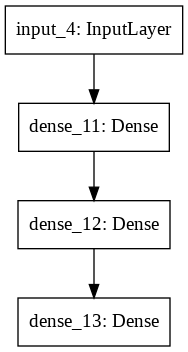

In [ ]:
mnist_model.summary()
keras.utils.plot_model(mnist_model, "mnist_model.png")

load data and put them into appropriate sets, and also reshape such that the input is in the right format.

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

X_train = X_train.reshape(60000, 784).astype("float32") / 255
X_test = X_test.reshape(10000, 784).astype("float32") / 255

Now we can compile model. Note that there are a lot of loss functions, optimizers, and metrics you can choose from

In [ ]:
mnist_model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

Fit the model with batch size, epoch, validation split configurations. Feel free to change the parameters to play around. 

In [ ]:
history = mnist_model.fit(X_train, y_train, batch_size=256, 
                        epochs=10, validation_split=0.1)

Epoch 1/10
211/211 [==============================] - 1s 5ms/step - loss: 0.4817 - accuracy: 0.8681 - val_loss: 0.2137 - val_accuracy: 0.9392
Epoch 2/10
211/211 [==============================] - 1s 4ms/step - loss: 0.2271 - accuracy: 0.9331 - val_loss: 0.1521 - val_accuracy: 0.9582
Epoch 3/10
211/211 [==============================] - 1s 4ms/step - loss: 0.1675 - accuracy: 0.9504 - val_loss: 0.1237 - val_accuracy: 0.9673
Epoch 4/10
211/211 [==============================] - 1s 4ms/step - loss: 0.1339 - accuracy: 0.9594 - val_loss: 0.1154 - val_accuracy: 0.9685
Epoch 5/10
211/211 [==============================] - 1s 4ms/step - loss: 0.1129 - accuracy: 0.9665 - val_loss: 0.1000 - val_accuracy: 0.9720
Epoch 6/10
211/211 [==============================] - 1s 4ms/step - loss: 0.0976 - accuracy: 0.9706 - val_loss: 0.0962 - val_accuracy: 0.9728
Epoch 7/10
211/211 [==============================] - 1s 4ms/step - loss: 0.0849 - accuracy: 0.9745 - val_loss: 0.0999 - val_accuracy: 0.9727
Epoch 

Evaluating the model by looking at loss and accuracy 

In [ ]:
test_scores = mnist_model.evaluate(X_test, y_test, verbose=2)
print(test_scores)

313/313 - 0s - loss: 0.0963 - accuracy: 0.9722
[0.09625445306301117, 0.9721999764442444]


The model gave a pretty good performance result on the test set, with 0.0966 for loss and 0.9718 for accuracy. We can also visualize the learning process throughout iterations. 

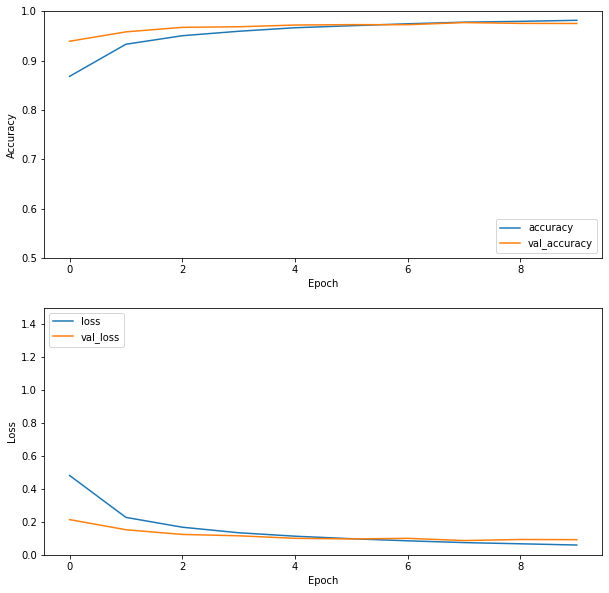

In [ ]:
visualize(history.history)

For this specific model, we can see that 10 epoch is not exactly necessary for loss and accuracy to reach to val_loss and val_accuracy. We can stop around epoch 6 to avoid overfitting. 

A nice thing we can do at the end of model building is to save it. We can save the model into a file, delete the model, and load the exact same model

In [ ]:
mnist_model.save("path_to_mnist_model")
del mnist_model
mnist_model = keras.models.load_model("path_to_mnist_model")

INFO:tensorflow:Assets written to: path_to_mnist_model/assets


We can see from the output that the loss is 0.09, and the accuracy is 97.18%, which means that the recognization on the test set is correct at 97.18% of the times. We can repeatedly change the functions and configurations to see what models gives the minimum loss and/or maximum accuracy.  

## Advanced features for functional APIs

We also use functional API when there are shared layers, which are layers that are used multiple times in the same model, enabling sharing of inofrmation across different inputs. We are able to use less data with shared layers as well. All we need to do to share a layer is to call the instance multiple times. 

Below we make a embedding for 526 unique words mapped to 32-dimensional vectors, 2 variable-length integer sequence, and resue the same layers to encode both integer sequences. 

In [ ]:
# Variable-length sequence of integers
input_1 = keras.Input(shape=(None,), dtype="int64")
input_2 = keras.Input(shape=(None,), dtype="int32")

shared_embedding = layers.Embedding(526, 32)
# Reuse the same layer
encoded_input_1 = shared_embedding(input_1)
encoded_input_2 = shared_embedding(input_2)

# References

Glossary: https://developers.google.com/machine-learning/glossary/

Types of layers: https://keras.io/api/layers/

Kernel Initializers: https://www.tensorflow.org/api_docs/python/tf/keras/initializers

Sequential model examples: https://www.tensorflow.org/guide/keras/sequential_model

MLP examples: https://www.analyticsvidhya.com/blog/2020/12/mlp-multilayer-perceptron-simple-overview/

CNN examples: https://www.tensorflow.org/tutorials/images/cnn



###Very good general tutorial websites:

https://www.educba.com/deep-learning-networks/

https://machinelearningmastery.com/tensorflow-tutorial-deep-learning-with-tf-keras/

https://towardsdatascience.com/a-simple-introduction-to-tensorflow-d992eb2e3dbb

https://towardsdatascience.com/starting-out-in-deep-learning-a83387904538

https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/


